In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Tugas\insurance.csv')
data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [2]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [7]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [9]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [10]:
data['region']= data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [12]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size= 0.20, random_state=42)

In [15]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
lr = LinearRegression ()
lr.fit(X_train, y_train)
svm = SVR ()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [18]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10796.654413,11001.128629
887,5272.17580,7116.295018,9492.515425,5246.574614,5840.174656
890,29330.98315,36909.013521,9648.758701,28310.536488,28001.980112
1293,9301.89355,9507.874691,9555.044136,9366.330877,9745.291602
259,33750.29180,27013.350008,9420.421978,34564.192598,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47261.012783,45431.423211
575,12222.89830,11814.555568,9625.431547,12559.186959,12465.025294
535,6067.12675,7638.107736,9504.168517,6522.899421,6974.336525
543,63770.42801,40959.081722,9605.004594,46822.509164,47862.047791


In [19]:
import matplotlib.pyplot as plt

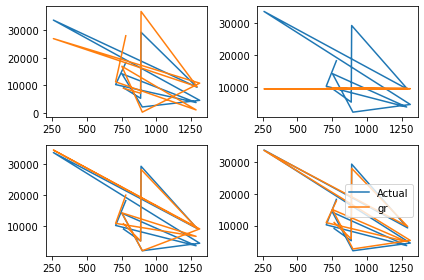

In [20]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [21]:
from sklearn import metrics

In [22]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)
print(score1,score2,score3,score4)
from sklearn.metrics import classification_report

0.7833463107364539 -0.07229762787861826 0.8652440829308478 0.8779726251291786


In [23]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)
print(s1,s2,s3,s4)

4186.508898366435 8592.428727899724 2466.2067932287937 2447.951558054584


In [24]:
data = {'age': 40,
       'sex': 1,
       'bmi' :40.30,
       'childern':4,
       'smoker':1,
       'region':2}

df = pd.DataFrame(data, index=[0])
df

,age,sex,bmi,childern,smoker,region
0,40,1,40.3,4,1,2


In [25]:
new_pred = gr.predict(df)
print(new_pred)

[43839.34586293]


In [26]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [27]:
import joblib

In [28]:
joblib.dump(gr,'model_joblib_qr')
model = joblib.load('model_joblib_qr')

In [29]:
model.predict(df)

array([42148.361888])

In [30]:
from tkinter import *

In [31]:
import joblib

In [ ]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model = joblib.load('model_joblib_qr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text='Insurance Cost').grid(row=77)
    Label(master, text=result).grid(row=7)
    
master = Tk()
master.title('Insurance Health Cost Prediction')
label = Label(master, text='Insurance Cost Prediction', bg ='black',
            fg='white').grid(row=0, columnspan=2)
Label(master,text='Masukan Umur').grid(row=1)
Label(master,text='Pria atau Perempuan [1/0]').grid(row=2)
Label(master,text='Masukan BMI').grid(row=3)
Label(master,text='Masukan Jumlah Anak').grid(row=4)
Label(master,text='Apakah merokok? Yes/No[1/0]').grid(row=5)
Label(master,text='Wilayah[1-4]').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,text='Predict', command=show_entry).grid()
mainloop()